In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns # визуализация данных
import numpy as np
%matplotlib inline

In [2]:
import os
lst = os.listdir('./extracted_features/size_group30')

lst_data = []
for file in lst:
    lst_data.append(pd.read_csv('./extracted_features/size_group30/' + file))

In [3]:
all_data = pd.concat(lst_data, ignore_index=True)
all_data = all_data.drop(['Unnamed: 0'], axis = 1)
all_data

,Average_Angle,Max_Angle,Std_Angle,Average_Dist,Max_Dist,Std_Dist,Average_Time,Max_Time,Std_Time,Condition
0,18.493074,353.659808,62.567657,8.116586,14.142136,3.771079,21.392657,525.7372,93.654431,1
1,7.437576,36.869898,11.077024,6.417508,12.369317,3.570564,4.018627,4.5455,0.097953,1
2,12.966760,90.000000,22.748001,1.762794,4.472136,1.012862,6.400953,19.9981,4.208699,1
3,33.000000,90.000000,30.962178,1.224045,2.236068,0.367488,5.328290,8.0368,1.871540,1
4,32.656505,90.000000,29.901887,1.265247,2.236068,0.407205,5.086820,12.0004,2.021906,1
...,...,...,...,...,...,...,...,...,...,...
11589,3.801182,13.736268,3.350748,10.109370,14.764823,2.857849,4.000940,4.1161,0.032457,1
11590,8.595091,45.000000,10.351069,4.482626,7.071068,1.583055,4.009407,4.9999,0.282269,1
11591,27.237501,90.000000,30.178397,1.562770,3.162278,0.625367,4.801093,12.0025,1.903183,1
11592,31.427509,90.000000,19.026295,1.722480,3.000000,0.547477,4.134257,8.0015,0.718143,1


In [4]:
n_samples = len(all_data[all_data.Condition == 0])

In [5]:
from sklearn.utils import resample
sampled_0 = resample(all_data[all_data.iloc[:, -1] == 0], replace = False, n_samples = n_samples, random_state=39)
sampled_1 = resample(all_data[all_data.iloc[:, -1] == 1], replace = False, n_samples = n_samples, random_state=39)

all_data = pd.concat([sampled_0, sampled_1])

In [6]:
len(all_data[all_data.Condition == 0])

4110

In [7]:
len(all_data[all_data.Condition == 1])

4110

<AxesSubplot:>

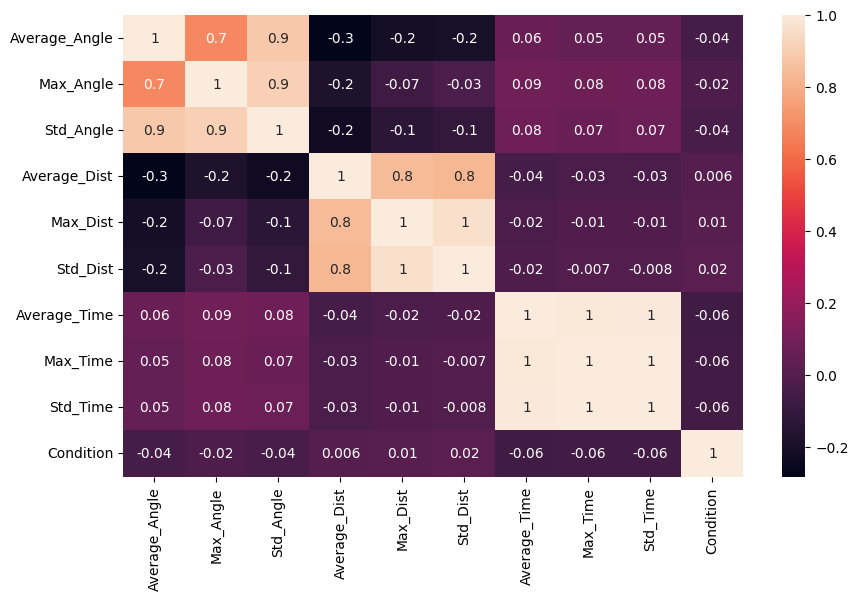

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8220 entries, 7082 to 4318
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Average_Angle  8220 non-null   float64
 1   Max_Angle      8220 non-null   float64
 2   Std_Angle      8220 non-null   float64
 3   Average_Dist   8220 non-null   float64
 4   Max_Dist       8220 non-null   float64
 5   Std_Dist       8220 non-null   float64
 6   Average_Time   8220 non-null   float64
 7   Max_Time       8220 non-null   float64
 8   Std_Time       8220 non-null   float64
 9   Condition      8220 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 706.4 KB


array([[<AxesSubplot:title={'center':'Average_Angle'}>,
        <AxesSubplot:title={'center':'Max_Angle'}>,
        <AxesSubplot:title={'center':'Std_Angle'}>],
       [<AxesSubplot:title={'center':'Average_Dist'}>,
        <AxesSubplot:title={'center':'Max_Dist'}>,
        <AxesSubplot:title={'center':'Std_Dist'}>],
       [<AxesSubplot:title={'center':'Average_Time'}>,
        <AxesSubplot:title={'center':'Max_Time'}>,
        <AxesSubplot:title={'center':'Std_Time'}>],
       [<AxesSubplot:title={'center':'Condition'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

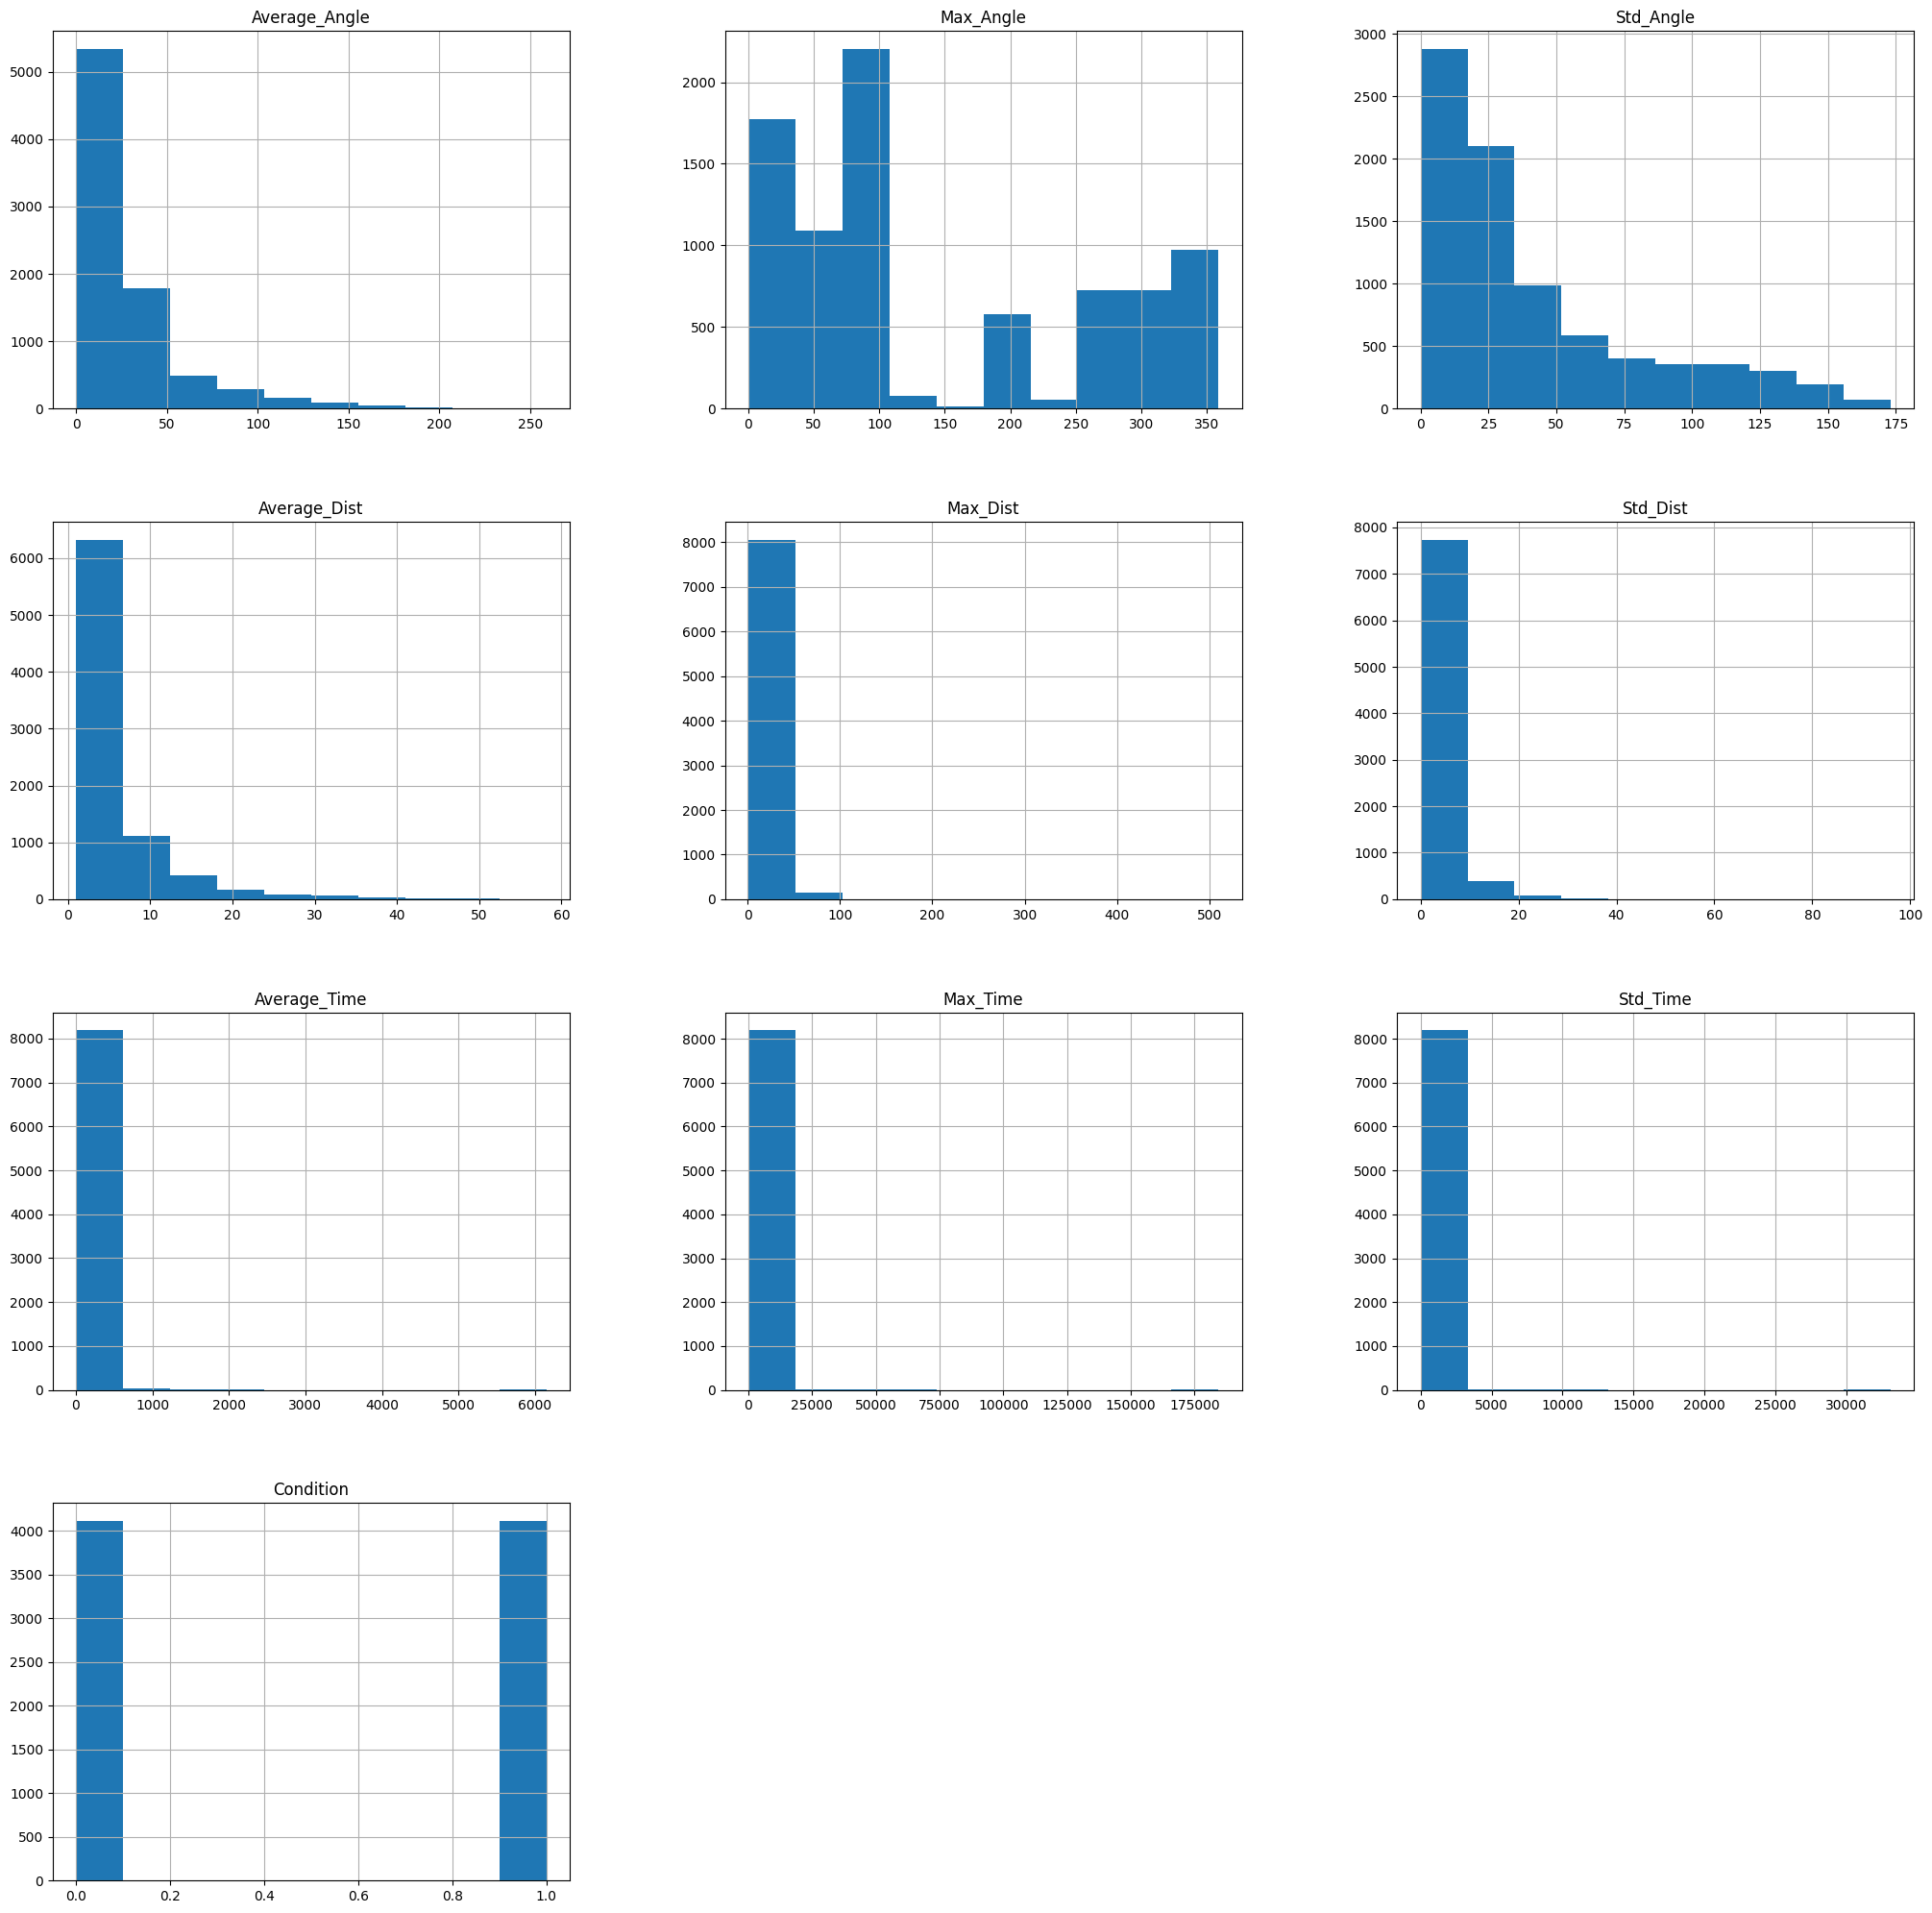

In [10]:
all_data.hist(figsize = (25, 25), grid = True)

In [11]:
Dup_Rows = all_data[all_data.duplicated()]
Dup_Rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Average_Angle  0 non-null      float64
 1   Max_Angle      0 non-null      float64
 2   Std_Angle      0 non-null      float64
 3   Average_Dist   0 non-null      float64
 4   Max_Dist       0 non-null      float64
 5   Std_Dist       0 non-null      float64
 6   Average_Time   0 non-null      float64
 7   Max_Time       0 non-null      float64
 8   Std_Time       0 non-null      float64
 9   Condition      0 non-null      int64  
dtypes: float64(9), int64(1)
memory usage: 0.0 bytes


<AxesSubplot:xlabel='Max_Dist'>

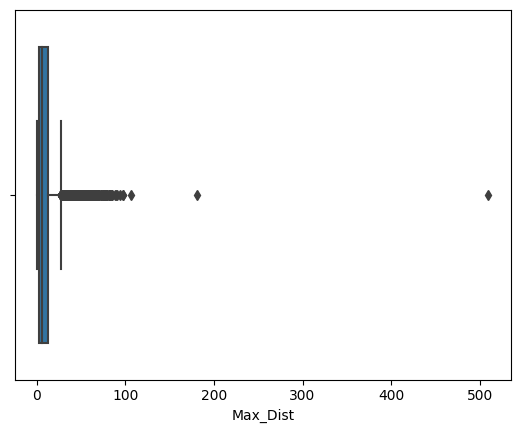

In [12]:
sns.boxplot(x=all_data['Max_Dist'])

In [13]:
Q1 = all_data.quantile(0.25)
Q3 = all_data.quantile(0.75)
IQR = Q3 - Q1
all_data = all_data[~((all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))).any(axis=1)]
all_data.shape

(5690, 10)

array([[<AxesSubplot:title={'center':'Average_Angle'}>,
        <AxesSubplot:title={'center':'Max_Angle'}>,
        <AxesSubplot:title={'center':'Std_Angle'}>],
       [<AxesSubplot:title={'center':'Average_Dist'}>,
        <AxesSubplot:title={'center':'Max_Dist'}>,
        <AxesSubplot:title={'center':'Std_Dist'}>],
       [<AxesSubplot:title={'center':'Average_Time'}>,
        <AxesSubplot:title={'center':'Max_Time'}>,
        <AxesSubplot:title={'center':'Std_Time'}>],
       [<AxesSubplot:title={'center':'Condition'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

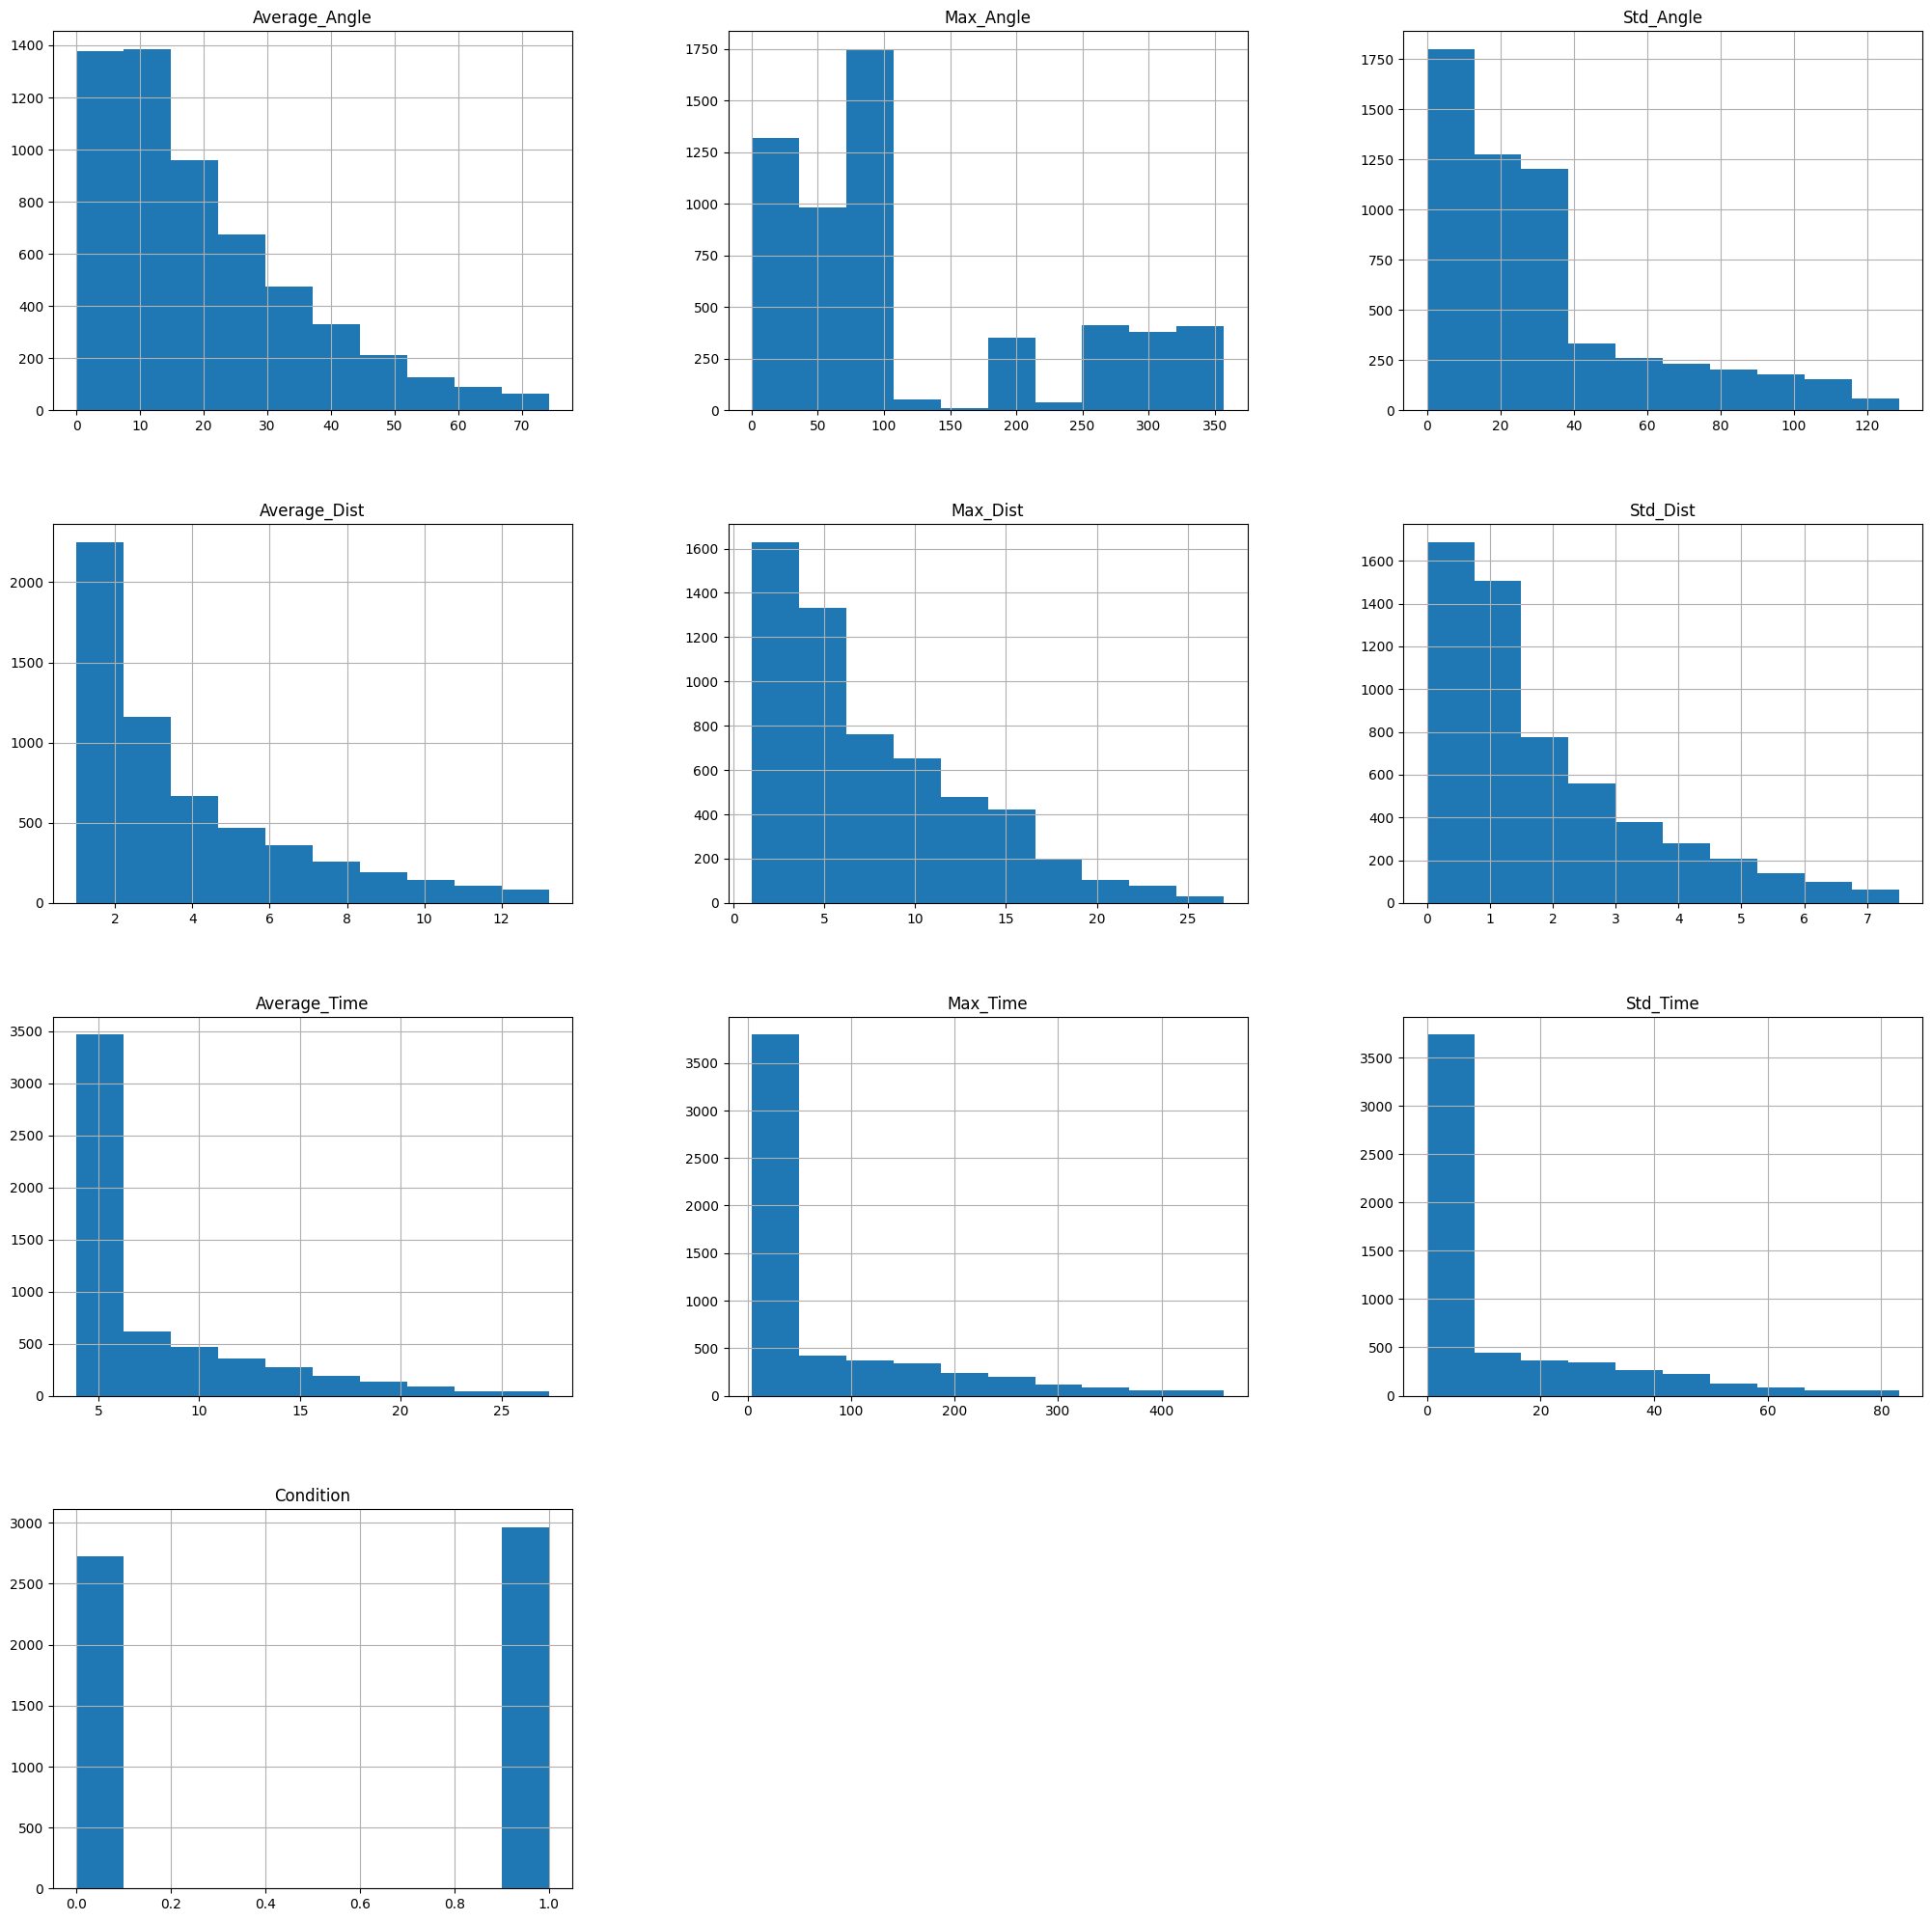

In [14]:
all_data.hist(figsize = (25, 25), grid = True)

<AxesSubplot:xlabel='Max_Dist'>

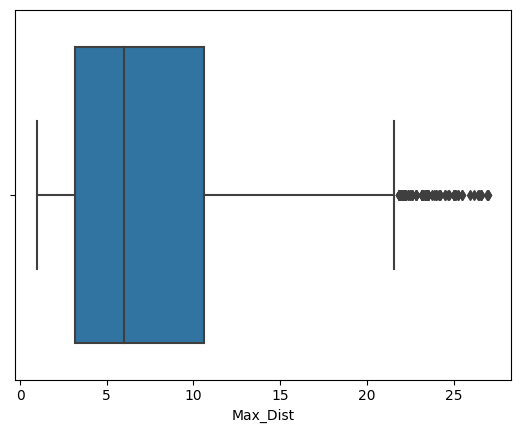

In [15]:
sns.boxplot(x=all_data['Max_Dist'])

<AxesSubplot:>

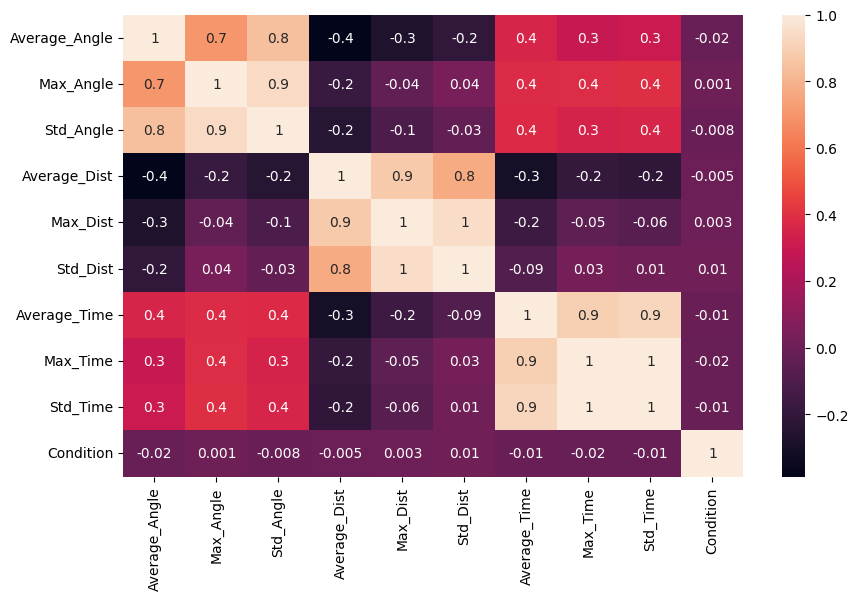

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

Обучение

In [17]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, label_binarize

In [18]:
X = all_data.drop('Condition', axis = 1)
y = all_data.Condition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

Градиентый бустинг

In [19]:
from xgboost import XGBClassifier

In [20]:
grid_param = {'learning_rate': [0.02], 
        'min_child_weight': [1, 5],
        'max_depth': [10, 50, 100],
        'n_estimators': [50, 100, 500]
        }

In [21]:
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, grid_param, cv = 5, n_jobs = -1)

grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.02], 'max_depth': [10, 50, 100],
                         'min_child_weight': [1, 5],
                         'n_estimators': [50, 100, 500]})

In [22]:
best_clf = grid_xgb.best_estimator_
best_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.02,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 10,
 'max_leaves': 0,
 'min_child_weight': 5,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [23]:
y_pred = best_clf.predict(X_test)

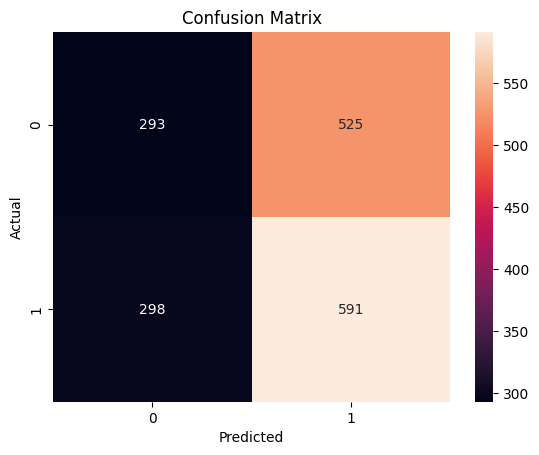

In [24]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [25]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      0.36      0.42       818
     class 1       0.53      0.66      0.59       889

    accuracy                           0.52      1707
   macro avg       0.51      0.51      0.50      1707
weighted avg       0.51      0.52      0.51      1707



Случайный лес

In [26]:
grid_param = {
    'n_estimators': [50, 100, 200, 400],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(2, 16, 4)
}

In [27]:
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc, grid_param, cv = 3, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 16, 4),
                         'n_estimators': [50, 100, 200, 400]})

In [28]:
best_clf = grid_rfc.best_estimator_
best_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [29]:
y_pred = best_clf.predict(X_test)

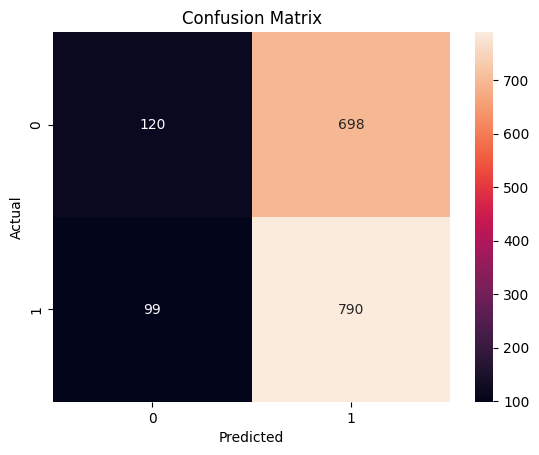

In [30]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [31]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.55      0.15      0.23       818
     class 1       0.53      0.89      0.66       889

    accuracy                           0.53      1707
   macro avg       0.54      0.52      0.45      1707
weighted avg       0.54      0.53      0.46      1707



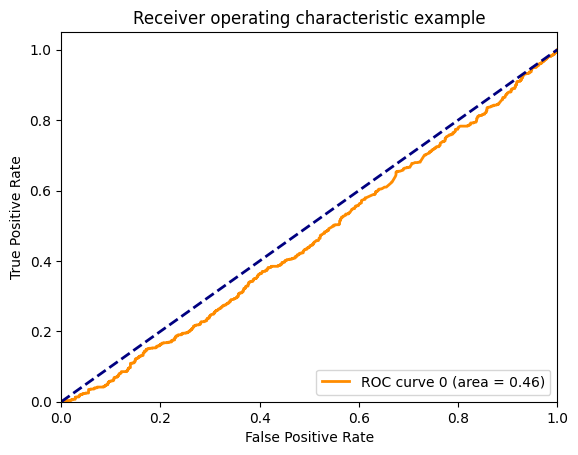

In [32]:
y_roc = label_binarize(y, classes = [0, 1])
y_test_roc = label_binarize(y_test, classes = [0, 1])
n_classes = y_roc.shape[1]

y_score = best_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

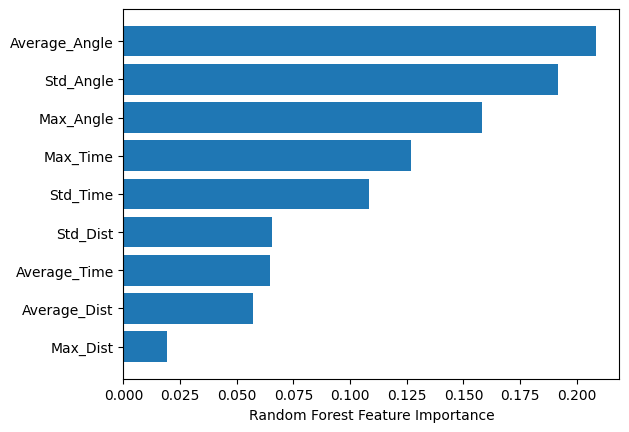

In [33]:
sorted_idx = best_clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], best_clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [34]:
np.sum(best_clf.feature_importances_)

0.9999999999999998

KNN

In [35]:
grid_params = {'n_neighbors' : [i for i in range(1, 11)],
                'weights': ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan']}

In [36]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, grid_params, verbose = 1, cv = 3, n_jobs = -1)
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [37]:
best_clf = grid_knn.best_estimator_
best_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [38]:
y_pred = best_clf.predict(X_test)

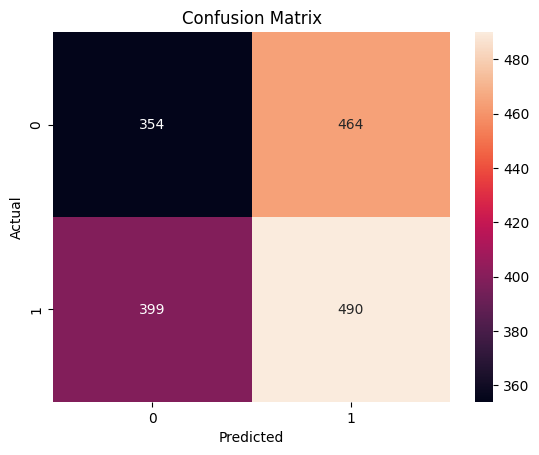

In [39]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [40]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.47      0.43      0.45       818
     class 1       0.51      0.55      0.53       889

    accuracy                           0.49      1707
   macro avg       0.49      0.49      0.49      1707
weighted avg       0.49      0.49      0.49      1707

